# Importing Dataset



In [61]:
# !pip install torch
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install transformers
# !pip install nltk
# !pip install squarify
# !pip install sns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')

# 0. Exploring Data

In [6]:
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
# checking for duplicates
imdb_data.duplicated().sum()

418

In [4]:
# checking for null
imdb_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [3]:
# dropping duplicates and changing dataframe to df to keep original data untouched
imdb = imdb_data.drop_duplicates()
df = imdb

In [68]:
#checking for dataset balance
df['sentiment'].value_counts()

# we can see the dataset is rather balanced

df = df[:10000]
# only using 10000 for plotting

### Removing stopwords and puncuation

In [69]:
import nltk
from nltk.corpus import stopwords
import re

In [70]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yonge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yonge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
# df['review'][0]
#things to remove: stopwords, these <br /><br />, and punctuation

In [72]:
def clean_text(sentence: str):
    sentence = sentence.lower()
    sentence = re.sub(r"<br />", "", sentence)
    sentence = re.sub(r"[^a-z0-9 ]", "", sentence)
    sentence = re.sub(r"\s+", " ", sentence)

    tokenized = nltk.tokenize.word_tokenize(sentence)

    # remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    tokenized = [word for word in tokenized if word not in stop_words]
    sentence = sentence.split()

    return sentence

In [73]:
df['review'] = df['review'].apply(clean_text)
# df['review'][0]

C:\Users\Yonge\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


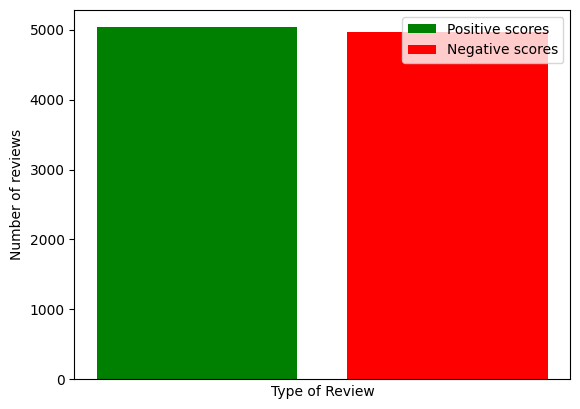

In [74]:
#visualizing positive and negative review ratio

df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']

def plot(positive: int, negative: int):
    # Plot the positive review counts
    plt.bar(0, positive, label='Positive scores', color='Green')
    plt.legend()

    # Plot the negative review counts
    plt.bar(1,negative, label='Negative scores', color='Red')
    plt.legend()

    # Set the x-axis label
    plt.xlabel('Type of Review')

    # Set the y-axis label
    plt.ylabel('Number of reviews')

    # Hide the x-axis tick labels
    plt.xticks([])

    # Show the plot
    plt.show()

plot(len(df_positive), len(df_negative))

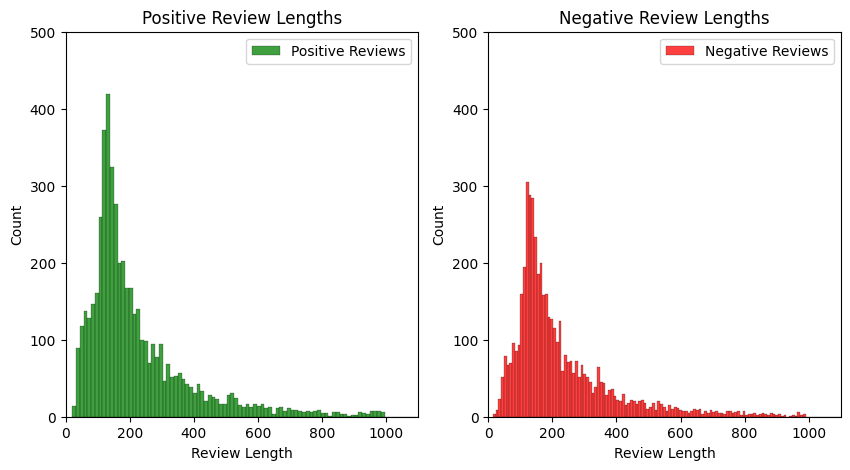

In [75]:
# Get the length of each review in the positive and negative datasets
positive_review_lengths = [len(review) for review in df_positive['review']]
negative_review_lengths = [len(review) for review in df_negative['review']]

def plot(len_positive: int, len_negative: int):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram for the positive review lengths
    sns.histplot(len_positive,
                 bins=150,
                 color='green',
                 label='Positive Reviews',
                 ax=ax1)

    # Add a title, x-label, and y-label for the first subplot
    ax1.set_title('Positive Review Lengths')
    ax1.set_xlabel('Review Length')
    ax1.set_ylabel('Count')

    # Set the x-axis and y-axis limits for the first subplot
    ax1.set_xlim(0, 1100)
    ax1.set_ylim(0, 500)

    # Add a legend to the first subplot
    ax1.legend(loc='upper right')

    # Plot the histogram for the negative review lengths
    sns.histplot(len_negative,
                 bins=150,
                 color='red',
                 label='Negative Reviews',
                 ax=ax2)

    # Add a title, x-label, and y-label for the second subplot
    ax2.set_title('Negative Review Lengths')
    ax2.set_xlabel('Review Length')
    ax2.set_ylabel('Count')

    # Set the x-axis and y-axis limits for the second subplot
    ax2.set_xlim(0, 1100)
    ax2.set_ylim(0, 500)

    # Add a legend to the second subplot
    ax2.legend(loc='upper right')

    # Show the plots
    plt.show()

plot(positive_review_lengths, negative_review_lengths)



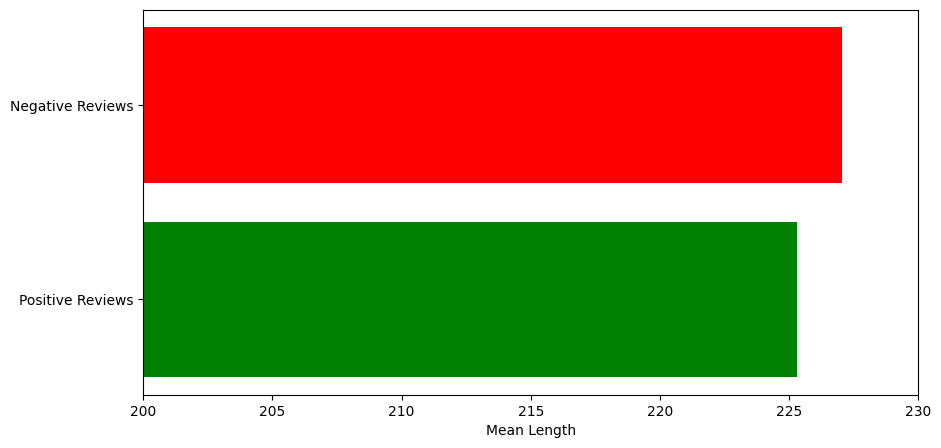

In [76]:
positive_mean = np.mean(positive_review_lengths)
negative_mean = np.mean(negative_review_lengths)

def plot(positive, negative):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))

    # Create a bar plot with the positive and negative review length means
    plt.barh(['Positive Reviews', 'Negative Reviews'],
            [positive, negative],
            color=['green', 'red'])
    # Set the x-axis limits to the range 250-260 to better show difference
    ax = plt.gca()
    ax.set_xlim(200, 230)
    # x-label to the plot
    plt.xlabel('Mean Length')
    
    # Show the plot
    plt.show()

plot(positive_mean, negative_mean)
# reviews are about equal lenght on average

In [77]:
# df_positive['review'][0]

In [78]:
# pos = Counter(df_positive['review'][0]).most_common(10)

# print([word for word, count in pos if word not in {'the':2, 'is':3, 'of':1}])

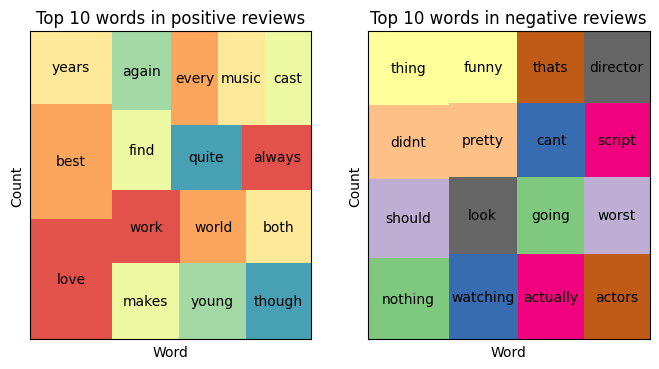

In [79]:
from collections import Counter
import squarify

# Use the Counter class to count the number of occurrences of each word greater than 3 in the positive and negative datasets

pos_count = Counter([word for review in df_positive['review'] for word in review if len(word)>3])
neg_count = Counter([word for review in df_negative['review'] for word in review if len(word)>3])
                                                  
# Get the top 100 most frequent words in the positive and negative datasets
positive_top_words =  pos_count.most_common(100)
negative_top_words = neg_count.most_common(100)

# Creating list of words from each dataset to remove duplicates in plot
positive_words = [word for word, count in positive_top_words]
negative_words = [word for word, count in negative_top_words]


def plot(positive_count, negative_count):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    # Use the squarify function to plot the top 10 most frequent words in the positive dataset
    squarify.plot(sizes=[count for word, count in positive_top_words if word not in negative_words],
                  label=[word for word, count in positive_top_words if word not in negative_words],
                  color=sns.color_palette("Spectral"),
                  ax=ax1)

    # Use the squarify function to plot the top 10 most frequent words in the negative dataset
    squarify.plot(sizes=[count for word, count in negative_top_words if word not in positive_words],
                  label=[word for word, count in negative_top_words if word not in positive_words],
                  color=sns.color_palette("Accent"),
                  ax=ax2)

    # Add a title, x-label, and y-label to the first subplot
    ax1.set_title('Top 10 words in positive reviews')
    ax1.set_xlabel('Word')
    ax1.set_ylabel('Count')
    
    # Hide the x and y axis tick label
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Add a title, x-label, and y-label to the second subplot
    ax2.set_title('Top 10 words in negative reviews')
    ax2.set_xlabel('Word')
    ax2.set_ylabel('Count')
    
    # Hide the x and y axis tick labels
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # Show the plots
    plt.show()

plot(positive_top_words, negative_top_words)

# Data Preprocessing

going to do seperate data preprocessing for the model

In [43]:
# creating new dataframe for the model, a couple examples to keep training fast
df = imdb[:1000]

In [44]:
# changing positive and negative to numerical values
df['sentiment'].replace('positive', 1, inplace=True)
df['sentiment'].replace('negative', 0, inplace=True)
# df.head()

c:\Users\Yonge\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
from transformers import BertTokenizerFast

In [46]:
# Creating BertTokenzierFats object
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [47]:
test = "this movie was the best movie I have ever seen!"
tokens = tokenizer.tokenize(test)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Sentence: {test}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: this movie was the best movie I have ever seen!
Tokens: ['this', 'movie', 'was', 'the', 'best', 'movie', 'i', 'have', 'ever', 'seen', '!']
Token IDs: [2023, 3185, 2001, 1996, 2190, 3185, 1045, 2031, 2412, 2464, 999]


In [48]:
encoding = tokenizer(
    test,
    max_length=32, 
    padding='max_length',
    return_token_type_ids=False,
    truncation=True,
    return_tensors='pt'
)
encoding.keys()
# tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

dict_keys(['input_ids', 'attention_mask'])

## Splitting the data

In [49]:
import torch as th
from torch.utils.data import Dataset, DataLoader
import transformers

In [50]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [51]:
class ReviewDataset(Dataset):
    def __init__(self, reviews, sentiments, tokenizer):
        self.reviews = reviews
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_len = 512
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        sentiment = self.sentiments[idx]
        
        encoding = self.tokenizer(
            review,
            max_length = self.max_len,
            padding='max_length',
            return_token_type_ids=False,
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review, 
            'sentiment': th.tensor(sentiment, dtype=th.long),
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }
    

In [52]:
# testing = ReviewDataset(df['review'], df['sentiment'], tokenizer)
# testing.__getitem__(1)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_train, df_test = train_test_split(
  df,
  test_size=0.1
)
# df_train

In [55]:
def data_loader(df, tokenizer, batch_size):
    ds = ReviewDataset(
    reviews=df['review'].to_numpy(),
    sentiments=df['sentiment'].to_numpy(),
    tokenizer=tokenizer,
  )
    return DataLoader(ds, batch_size=batch_size, shuffle=True)

In [56]:
BATCH_SIZE = 1
train_dataloader = data_loader(df_train, tokenizer, batch_size=BATCH_SIZE)
test_dataloader = data_loader(df_test, tokenizer, batch_size=BATCH_SIZE)

In [57]:
data = next(iter(train_dataloader))
data.keys()
# print(data['input_ids'].shape)
# print(data['attention_mask'].shape)
# print(data['sentiment'].shape)

dict_keys(['review_text', 'sentiment', 'input_ids', 'attention_mask'])

In [58]:
# model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
# loss, logits = model(
#                     input_ids=encoding['input_ids'], 
#                     attention_mask=encoding['attention_mask'],
#                     labels=th.tensor([1])
#                     )[:2]
# type(loss)

## Creating model

In [79]:
class IMDBSentimentClassifier(th.nn.Module):
    def __init__(self):
        super(IMDBSentimentClassifier, self).__init__()
        self.model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
        # self.out=th.nn.Sigmoid()

    def forward(self, input_ids, attention_mask, labels):
        _, logits = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )[:2]
        
        return logits
        # self.out(logits)

In [80]:
model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
# model=IMDBSentimentClassifier()
encoding.to(device)
model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Training

In [81]:
EPOCHS = 1
optimizer = th.optim.SGD(model.parameters(), lr=00.1, momentum=0.9)
scheduler = th.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
# optimizer = th.optim.AdamW(model.parameters(), lr=1e-5)
# loss_fn = th.nn.BCEWithLogitsLoss()

In [82]:
def train_loop(dataloader, model, optimizer):
    model = model.train()
    size = len(dataloader.dataset)
    for batch, d in enumerate(dataloader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        sentiments = d["sentiment"].to(device)

        # Compute prediction and loss
        loss, _= model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=sentiments
            )[:2]
            
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        th.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step(loss)

        if batch % 100 == 0:
            current = batch * size
            print(f"loss: {loss:>7f}")
            

def test_loop(dataloader, model):
    model = model.eval()
    size = len(dataloader.dataset)
    correct = 0
    
    with th.no_grad():
        for d in dataloader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            sentiments = d["sentiment"].to(device)
            _, logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=sentiments
                )[:2]
            
            correct += (logits.argmax(1) == sentiments).type(th.float).sum().item()
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%")

In [83]:
for t in range(EPOCHS):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, optimizer)
    test_loop(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 0.490114
loss: 3.987406
loss: 0.014771
loss: 4.411205
loss: 4.538987


## Predict

In [ ]:
test = "Great movie, love the music and the story"

In [ ]:
def predict_sentiment(text):
    model.eval()
    classes = ['Positive', 'Negative']
    with th.no_grad():
        encoding = tokenizer(
            text,
            max_length = 512,
            padding='max_length',
            return_token_type_ids=False,
            truncation=True,
            return_tensors='pt'
        )
        encoding.to(device)
        output = model(**encoding).logits
        pred_proba = th.sigmoid(output)
        prediction = th.argmax(pred_proba, dim=1)
        print(f'Review: {text}')
        print(f'Sentiment: {classes[prediction]}')

In [ ]:
print(predict_sentiment(test_pos))


Review: Great movie, love the music and the story
Sentiment: Negative
None


# 4. 

# . Loading Model

# . Training Model